In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [115]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/9250/atherosclerosis.csv')
df

,expr,age,dose
0,107.351478,1,D1
1,104.504438,1,D1
2,103.435134,1,D1
3,109.572882,1,D1
4,114.993803,1,D1
...,...,...,...
59,101.851582,2,D2
60,105.239530,2,D2
61,99.350198,2,D2
62,108.091455,2,D2


In [116]:
model = ols('expr ~ C(age) + C(dose) + C(age):C(dose)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(age),197.452754,1.0,7.449841,0.008313
C(dose),16.912241,1.0,0.638094,0.427552
C(age):C(dose),0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


In [117]:
df = df.replace([1, 2], ['Молодой', 'Пожилой'])
df.rename(columns = {'age' : 'Возраст'}, inplace = True)

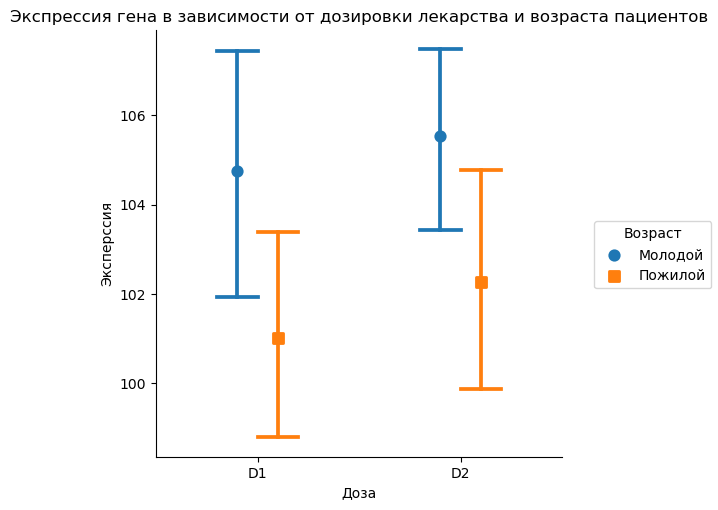

In [118]:
catplot = sns.catplot(x="dose",
    y="expr",
    data=df,
    hue="Возраст",
    kind="point",
    join=False,
    capsize=0.2,
    markers=["o", "s"],
    dodge=.2)
#catplot.legend(['Молодые', 'Старые'])
sns.move_legend(
    catplot, "right", ncol=1, title='Возраст', frameon = True
)
catplot.set(xlabel = "Доза", ylabel = "Эксперссия", title = 'Экспрессия гена в зависимости от дозировки лекарства и возраста пациентов')
plt.show()

In [152]:
df2 = pd.read_csv("https://stepik.org/media/attachments/lesson/9250/birds.csv")
df2

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1
...,...,...,...
59,17.054195,0,0
60,22.951551,0,0
61,18.799382,0,0
62,16.543161,0,0


In [153]:
model = ols('var4 ~ C(hormone) + C(sex) + C(hormone):C(sex)', data=df2).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(hormone),0.847472,1.0,0.086528,0.769653
C(sex),0.119762,1.0,0.012228,0.912318
C(hormone):C(sex),89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


In [154]:
df2['sex'] = df2['sex'].replace([0, 1], ['Мужской', 'Женский'] )
df2['hormone'] = df2['hormone'].replace([0, 1], ['Да', 'Нет'] )
df2.rename(columns = {'sex' : 'Пол'}, inplace = True)
df2

,var4,hormone,Пол
0,17.859039,Нет,Женский
1,20.842343,Нет,Женский
2,19.318099,Нет,Женский
3,20.064451,Нет,Женский
4,17.620316,Нет,Женский
...,...,...,...
59,17.054195,Да,Мужской
60,22.951551,Да,Мужской
61,18.799382,Да,Мужской
62,16.543161,Да,Мужской


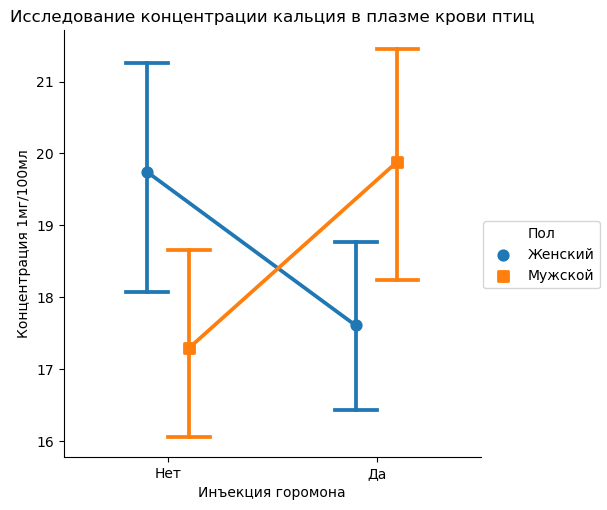

In [155]:
catplot = sns.catplot(x="hormone",
    y="var4",
    data=df2,
    hue="Пол",
    kind="point",
    capsize=0.2,
    markers=["o", "s"],
    dodge=.2)
#catplot.legend(['Молодые', 'Старые'])
sns.move_legend(
    catplot, "right", ncol=1, title='Пол', frameon = True
)
catplot.set(xlabel = "Инъекция горомона", ylabel = "Концентрация 1мг/100мл", title = 'Исследование концентрации кальция в плазме крови птиц')
plt.show()